# <mark>Attention!</mark>

This project was originally made in the Russian language. It takes quite a lot of effort to manually translate everything into English. So in order to understand what is going on here, **please use an automatic Google page translator**. It does a pretty decent job!

# Яндекс.Музыка

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс.Музыки вы сравните поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей вы получите из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Вы проверите данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки вы поищете возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.



## Обзор данных

Первое представление о данных Яндекс.Музыки.




In [4]:
# импорт библиотеки pandas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('datasets/yandex_music_project.csv')

In [6]:
# получение первых 10 строк таблицы df
df.head(10)

,Unnamed: 0,userID,Track,artist,genre,City,time,Day
0,0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [7]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  65079 non-null  int64 
 1     userID    65079 non-null  object
 2   Track       63848 non-null  object
 3   artist      57876 non-null  object
 4   genre       63881 non-null  object
 5     City      65079 non-null  object
 6   time        65079 non-null  object
 7   Day         65079 non-null  object
dtypes: int64(1), object(7)
memory usage: 4.0+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Нет нижних подчёркиваний между словами ("змеиного регистра")



Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Исправления стиля в заголовках столбцов, исключение пропусков. Затем проверка данных на дубликаты.

### Стиль заголовков
Выведим на экран названия столбцов:

In [8]:
# перечень названий столбцов таблицы df
df.columns

Index(['Unnamed: 0', '  userID', 'Track', 'artist', 'genre', '  City  ',
       'time', 'Day'],
      dtype='object')

Приведем названия в соответствие с хорошим стилем:
* несколько слов в названии запишите в «змеином_регистре»,
* все символы сделайте строчными,
* устраните пробелы.

Для этого переименуем колонки так:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

In [9]:
# переименование столбцов
df = df.rename(columns={'  userID': 'user_id', 'Track': 'track', '  City  ': 'city', 'Day': 'day'})

Проверим результат. Для этого ещё раз выведим на экран названия столбцов:

In [10]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['Unnamed: 0', 'user_id', 'track', 'artist', 'genre', 'city', 'time',
       'day'],
      dtype='object')

### Пропуски значений
Сначала посчитаем, сколько в таблице пропущенных значений.

In [11]:
# подсчёт пропусков
df.isna().sum()

Unnamed: 0       0
user_id          0
track         1231
artist        7203
genre         1198
city             0
time             0
day              0
dtype: int64

Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны для вашей работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

Заменим пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`

In [12]:
#это конечно то ещё извращение - использовать циклы в pandas, но раз вы так просите...
columns_to_replace = ['track', 'artist', 'genre']
for column in columns_to_replace:
    df[column] = df[column].fillna('unknown')

In [13]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
df[['track', 'artist', 'genre']] = df[['track', 'artist', 'genre']].fillna('unknown')

Убедимся, что в таблице не осталось пропусков. Для этого ещё раз посчитаем пропущенные значения.

In [14]:
# подсчёт пропусков
df.isna().sum()

Unnamed: 0    0
user_id       0
track         0
artist        0
genre         0
city          0
time          0
day           0
dtype: int64

### Дубликаты
Посчитаем явные дубликаты в таблице одной командой:

In [15]:
# подсчёт явных дубликатов
df.duplicated().sum()

0

Вызовем специальный метод `pandas`, чтобы удалить явные дубликаты:

In [16]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)

Посчитаем явные дубликаты в таблице

In [17]:
# проверка на отсутствие дубликатов
df.duplicated().sum()

0

Выведем на экран список уникальных названий жанров, отсортированный в алфавитном порядке. Для этого:
* извлечем нужный столбец датафрейма, 
* применим к нему метод сортировки,
* для отсортированного столбца вызовем метод, который вернёт уникальные значения из столбца.

In [18]:
# Просмотр уникальных названий жанров
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Просмотрим список и найдём неявные дубликаты названия `hiphop`. Это могут быть названия с ошибками или альтернативные названия того же жанра.

Мы видим следующие неявные дубликаты:
* *hip*,
* *hop*,
* *hip-hop*.

Чтобы очистить от них таблицу, напишем функцию `replace_wrong_genres()` с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

Функция должна исправить колонку `genre` в таблице `df`: заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`.

Вызовем `replace_wrong_genres()` и передадим ей такие аргументы, чтобы она устранила неявные дубликаты: вместо `hip`, `hop` и `hip-hop` в таблице должно быть значение `hiphop`:

In [19]:
# Устранение неявных дубликатов
df['genre'] = df['genre'].replace(['hip', 'hop', 'hip-hop'], 'hiphop')

Проверим, что заменили неправильные названия:

*   hip
*   hop
*   hip-hop

Выведем отсортированный список уникальных значений столбца `genre`:

In [20]:
# Проверка на неявные дубликаты
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Мы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения вы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверьте это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделим пользователей Москвы и Санкт-Петербурга
* Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


Для тренировки сначала выполним каждый из расчётов по отдельности. 

Оценим активность пользователей в каждом городе. Сгруппируем данные по городу и посчитаем прослушивания в каждой группе.



In [21]:
df.head(5)

,Unnamed: 0,user_id,track,artist,genre,city,time,day
0,0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday


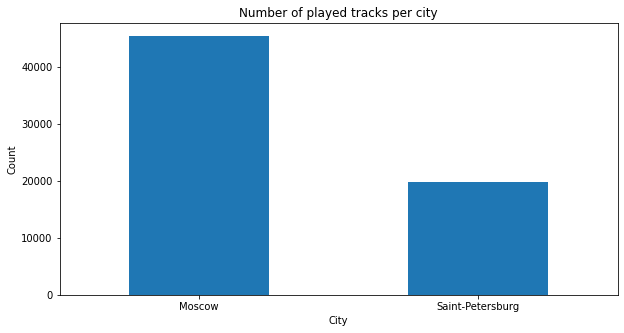

In [56]:
# Подсчёт прослушиваний в каждом городе
df.groupby('city')['track'].count().plot(kind='bar', rot=0, figsize=(10,5))
plt.title('Number of played tracks per city')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

# В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Теперь сгруппируем данные по дню недели и подсчитайте прослушивания в понедельник, среду и пятницу. Учтиём, что в данных есть информация только о прослушиваниях только за эти дни.


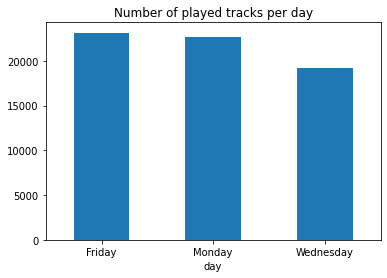

In [85]:
# Подсчёт прослушиваний в каждый из трёх дней
df.groupby('day')[['track']].count().plot(kind='bar',rot=0, legend=False)
plt.title('Number of played tracks per day')
plt.show()

В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

Теперь напишем функцию, которая объединит два эти расчёта.

Создаем функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. Ей понадобятся два параметра:
* день недели,
* название города.

В функции сохраним в переменную строки исходной таблицы, у которых значение:
  * в колонке `day` равно параметру `day`,
  * в колонке `city` равно параметру `city`.

Для этого применим последовательную фильтрацию с логической индексацией.

Затем посчитаем значения в столбце `user_id` получившейся таблицы. Результат сохраним в новую переменную. Вернём эту переменную из функции.

In [25]:
def number_tracks(day, city):
    track_list = df[(df['day'] == day) & (df['city'] == city)]
    track_list_count = track_list['user_id'].count()
    return track_list_count

Вызовем `number_tracks()` шесть раз, меняя значение параметров — так, чтобы получить данные для каждого города в каждый из трёх дней.

In [26]:
# количество прослушиваний в Москве по понедельникам
number_tracks('Monday', 'Moscow')

16715

In [27]:
# количество прослушиваний в Санкт-Петербурге по понедельникам
number_tracks('Monday', 'Saint-Petersburg')

5982

In [28]:
# количество прослушиваний в Москве по средам
number_tracks('Wednesday', 'Moscow')

11755

In [29]:
# количество прослушиваний в Санкт-Петербурге по средам
number_tracks('Wednesday', 'Saint-Petersburg')

7478

In [30]:
# количество прослушиваний в Москве по пятницам
number_tracks('Friday', 'Moscow')

16890

In [31]:
# количество прослушиваний в Санкт-Петербурге по пятницам
number_tracks('Friday', 'Saint-Petersburg')

6259

Создадим c помощью конструктора `pd.DataFrame` таблицу, где
* названия колонок — `['city', 'monday', 'wednesday', 'friday']`;
* данные — результаты, которые вы получили с помощью `number_tracks`.

In [32]:
# Таблица с результатами
columns = ['city', 'monday', 'wednesday', 'friday']
data = [['Moscow', 15740, 11056, 15945],['Saint-Petersburg', 5614, 7003, 5895]]

table = pd.DataFrame(columns = columns, data = data)
table

,city,monday,wednesday,friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраним таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [33]:
# получение таблицы moscow_general из тех строк таблицы df, 
# для которых значение в столбце 'city' равно 'Moscow'
moscow_general = df[df['city'] == 'Moscow']

In [34]:
# получение таблицы spb_general из тех строк таблицы df,
# для которых значение в столбце 'city' равно 'Saint-Petersburg'
spb_general = df[df['city'] == 'Saint-Petersburg']

Создадим функцию `genre_weekday()` с четырьмя параметрами:
* таблица (датафрейм) с данными,
* день недели,
* начальная временная метка в формате 'hh:mm', 
* последняя временная метка в формате 'hh:mm'.

Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [35]:
def genre_weekday(table, day, time1, time2):
    genre_df = table[(table['day'] == day) & (table['time'] > time1) & (table['time'] < time2)]
    genre_df_count = genre_df.groupby('genre')['track'].count()
    # в инструкциях перед этим заданием вы вроде просили не разводить зоопарк из переменных, а в задании просите это сделать
    genre_df_sorted = genre_df_count.sort_values(ascending=False)
    return genre_df_sorted[:10]
    
    

Cравним результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

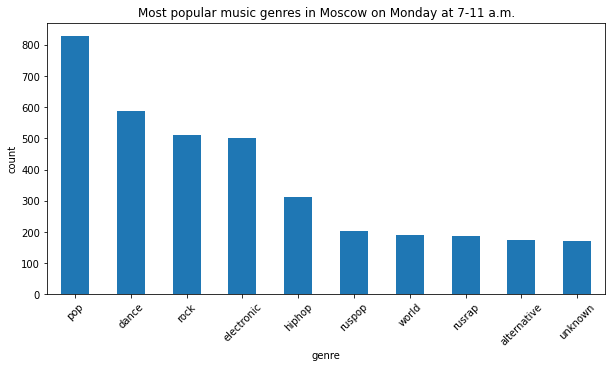

In [77]:
# вызов функции для утра понедельника в Москве (вместо df — таблица moscow_general)
# объекты, хранящие время, являются строками и сравниваются как строки
# пример вызова: genre_weekday(moscow_general, 'Monday', '07:00', '11:00')
genre_weekday(moscow_general, 'Monday', '07:00', '11:00').to_frame().plot(kind='bar', rot=45, figsize=(10, 5), legend=False)
plt.title('Most popular music genres in Moscow on Monday at 7-11 a.m.')
plt.ylabel('count')
plt.show()

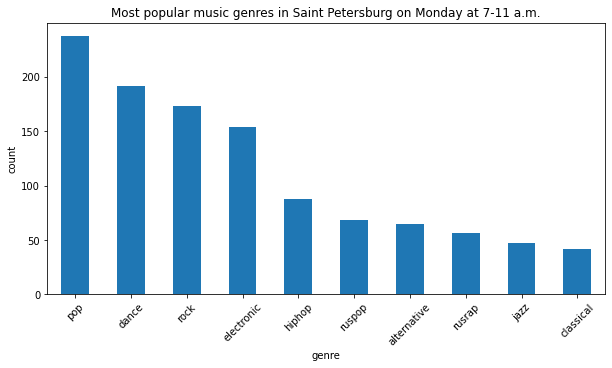

In [78]:
# вызов функции для утра понедельника в Петербурге (вместо df — таблица spb_general)
genre_weekday(spb_general, 'Monday', '07:00', '11:00').to_frame().plot(kind='bar', rot=45, figsize=(10, 5), legend=False)
plt.title('Most popular music genres in Saint Petersburg on Monday at 7-11 a.m.')
plt.ylabel('count')
plt.show()

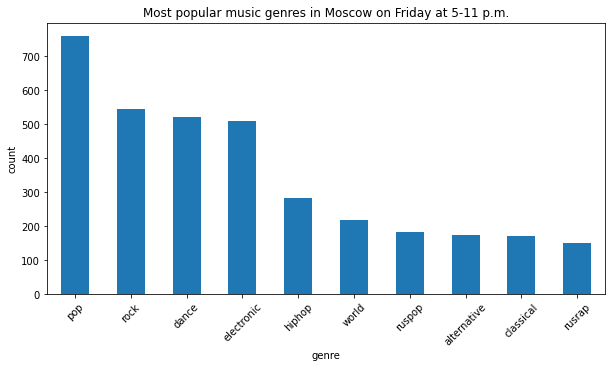

In [79]:
# вызов функции для вечера пятницы в Москве
genre_weekday(moscow_general, 'Friday', '17:00', '23:00').to_frame().plot(kind='bar', rot=45, figsize=(10, 5), legend=False)
plt.title('Most popular music genres in Moscow on Friday at 5-11 p.m.')
plt.ylabel('count')
plt.show()

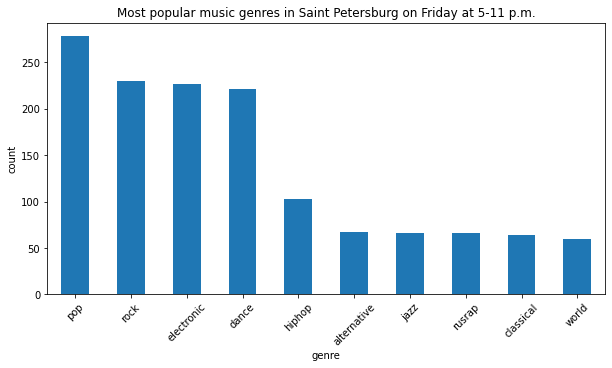

In [80]:
# вызов функции для вечера пятницы в Петербурге
genre_weekday(spb_general, 'Friday', '17:00', '23:00').to_frame().plot(kind='bar', rot=45, figsize=(10, 5), legend=False)
plt.title('Most popular music genres in Saint Petersburg on Friday at 5-11 p.m.')
plt.ylabel('count')
plt.show()

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.


Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах. 

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируем таблицу `moscow_general` по жанру и посчитаем прослушивания треков каждого жанра методом `count()`. Затем отсортируем результат в порядке убывания и сохраните его в таблице `moscow_genres`.

In [40]:
# одной строкой: группировка таблицы moscow_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в moscow_genres
moscow_genres = moscow_general.groupby('genre')['track'].count().sort_values(ascending=False)


Выведем на экран первые десять строк `moscow_genres`:

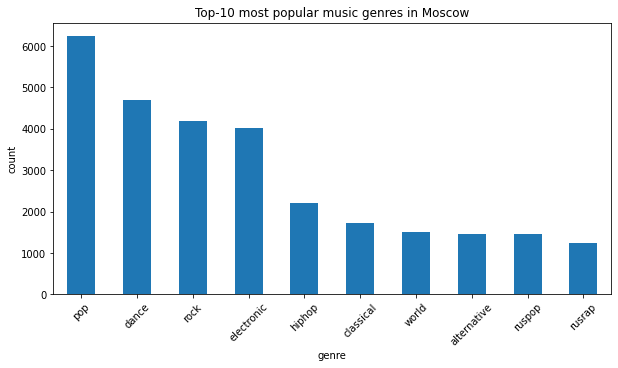

In [82]:
# просмотр первых 10 строк moscow_genres
moscow_genres.head(10).to_frame().plot(kind='bar', rot=45, figsize=(10, 5), legend=False)
plt.title('Top-10 most popular music genres in Moscow')
plt.ylabel('count')
plt.show()

Теперь повторите то же и для Петербурга.

Сгруппируем таблицу `spb_general` по жанру. Посчитаем прослушивания треков каждого жанра. Результат отсортируем в порядке убывания и сохраним в таблице `spb_genres`:


In [43]:
# одной строкой: группировка таблицы spb_general по столбцу 'genre', 
# подсчёт числа значений 'genre' в этой группировке методом count(), 
# сортировка получившегося Series в порядке убывания и сохранение в spb_genres
spb_genres = spb_general.groupby('genre')['track'].count().sort_values(ascending=False)

Выведем на экран первые десять строк `spb_genres`:

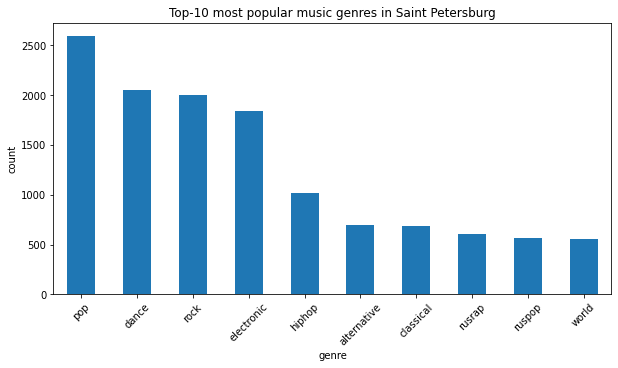

In [83]:
# просмотр первых 10 строк spb_genres
spb_genres.head(10).to_frame().plot(kind='bar', rot=45, figsize=(10, 5), legend=False)
plt.title('Top-10 most popular music genres in Saint Petersburg')
plt.ylabel('count')
plt.show()

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования

Мы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**На практике исследования содержат проверки статистических гипотез.**
Из данных одного сервиса не всегда можно сделать вывод о всех жителях города.
Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных. 